# <center> Classification with Feature Selection  </center>

### Select Features:

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. Three benefits of performing feature selection before modeling your data are:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

## Loading  the libraries:

In [35]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler


## Setting the Display option right:

In [36]:
def set_pandas_display_options() :

    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.precision = 3

    
    
set_pandas_display_options()

## Loading the Dataset:

In [37]:
df1 = pd.read_csv('C:/Users/TEC/Desktop/features_phase6a.csv')

In [38]:
df1.shape

(17337, 135)

In [39]:
df1.head()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,FG11,FG12,FG13,FG14,FG15,FG16,FG17,FG18,FG19,FG20,FG21,FG22,FG23,FG24,FG25,FG26,FG27,FG28,FG29,FG30,FG31,FG32,FG33,FG34,FG35,FG36,FG37,FG38,FG39,FG40,FG41,FG42,FG43,FG44,FG45,FG46,FG47,FG48,FG49,FG50,SW_COM,SW_SEMCOL,SW_STOP,SW_COL,ND,LEN,DP_DOBJ,DP_PREP,DP_POBJ,DP_NSUBJ,DP_NLA,DP_NRA,DP_NNC,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8,CG9,CG10,CG11,CG12,CG13,CG14,CG15,CG16,CG17,CG18,CG19,CG20,CG21,CG22,CG23,CG24,CG25,CG26,CG27,CG28,CG29,CG30,CG31,CG32,CG33,CG34,CG35,CG36,CG37,CG38,CG39,CG40,CG41,CG42,CG43,CG44,CG45,CG46,CG47,CG48,CG49,CG50,C_TITLE,C_AUTH,C_AFF,C_ABS,C_HIGL,C_CORR,C_GRANT,C_FUND,C_KEYW,C_KEYSW,NER_PER,NER_ORG,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP,LABEL
0,-1.238,0.995,-0.737,1.077,0.254,0.082,1.719e-01,0.598,-0.437,0.030,0.288,0.423,-1.425,-0.416,1.113,-0.415,-0.058,-0.232,-1.256,0.052,-0.696,-0.584,0.041,0.294,0.034,-1.728,-1.190,-0.835,-0.544,-0.167,2.535,0.081,-0.418,0.309,0.219,0.048,0.549,0.898,-1.017,-1.596,0.483,-0.555,-0.244,-0.023,-0.911,0.150,0.145,-0.980,0.202,-0.361,0,0,0,0,0,2,0,0,0,0,0.500,0.000,0.500,-1.238,0.995,-0.737,1.077,0.254,0.082,0.172,0.598,-0.437,0.03,0.288,0.423,-1.425,-0.416,1.113,-0.415,-0.058,-0.232,-1.256,0.052,-0.696,-0.584,0.041,0.294,0.034,-1.728,-1.19,-0.835,-0.544,-0.167,2.535,0.081,-0.418,0.309,0.219,0.048,0.549,0.898,-1.017,-1.596,0.483,-0.555,-0.244,-0.023,-0.911,0.15,0.145,-0.98,0.202,-0.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2,2,0,0,0,0,1,1,Others
1,-1.441,0.582,-1.290,0.644,-0.383,-0.413,-1.231e+00,-0.345,0.769,-0.922,1.059,0.358,0.330,0.119,0.076,-0.266,0.026,0.648,-0.191,-0.485,0.187,-0.154,-0.418,0.332,-0.876,-1.456,-0.437,-1.033,-1.728,0.067,2.888,0.217,-0.362,-0.526,-0.452,-0.305,0.035,-0.500,0.670,0.186,-0.456,-0.302,0.170,0.609,0.550,0.046,-0.999,0.614,-0.181,0.114,0,0,1,0,0,11,0,2,2,0,0.333,0.583,0.333,-1.238,0.995,-0.737,1.077,0.254,0.082,0.172,0.598,-0.437,0.03,0.288,0.423,-1.425,-0.416,1.113,-0.415,-0.058,-0.232,-1.256,0.052,-0.696,-0.584,0.041,0.294,0.034,-1.728,-1.19,-0.835,-0.544,-0.167,2.535,0.081,-0.418,0.309,0.219,0.048,0.549,0.898,-1.017,-1.596,0.483,-0.555,-0.244,-0.023,-0.911,0.15,0.145,-0.98,0.202,-0.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,12,5,0,0,0,0,2,1,abstract
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7,0,1,0,8,18,0,0,0,0,0.385,0.577,0.308,-1.238,0.995,-0.737,1.077,0.254,0.082,0.172,0.598,-0.437,0.03,0.288,0.423,-1.425,-0.416,1.113,-0.415,-0.058,-0.232,-1.256,0.052,-0.696,-0.584,0.041,0.294,0.034,-1.728,-1.19,-0.835,-0.544,-0.167,2.535,0.081,-0.418,0.309,0.219,0.048,0.549,0.898,-1.017,-1.596,0.483,-0.555,-0.244,-0.023,-0.911,0.15,0.145,-0.98,0.202,-0.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,26,0,0,6,0,0,3,1,authors
3,2.024,-0.520,-1.129,0.263,0.185,-0.052,-1.958e-05,-0.152,-1.881,0.438,0.133,0.893,-0.545,0.608,0.687,-1.822,-0.492,1.038,-0.477,-0.398,-0.322,-0.078,-0.401,0.100,0.840,0.393,1.127,-0.086,-1.790,-0.319,0.026,0.203,-1.040,-0.222,-0.607,0.227,0.249,1.236,0.544,0.477,-0.218,0.493,-0.737,-0.594,-0.448,0.410,-0.236,-0.372,1.498,-0.210,6,0,1,0,6,25,2,3,3,1,0.375,0.562,0.250,-1.238,0.995,-0.737,1.077,0.254,0.082,0.172,0.598,-0.437,0.03,0.288,0.423,-1.425,-0.416,1.113,-0.415,-0.058,-0.232,-1.256,0.052,-0.696,-0.584,0.041,0.294,0.034,-1.728,-1.19,-0.835,-0.544,-0.167,2.535,0.081,-0.418,0.309,0.219,0.048,0.549,0.898,-1.017,-1.596,0.483,-0.555,-0.244,-0.023,-0.911,0.15,0.145,-0.98,0.202,-0.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,2,26,15,0,5,0,0,4,1,affiliation
4,0.905,0.130,1.092,0.525,-0.218,-0.223,-6.998e-01,-0.605,0.804,-0.315,-0.348,1.373,0.410,-0.487,0.029,-0.819,-1.698,-0.871,0.692,0.126,0.446,-0.266,0.898,0.776,0.843,-0.505,0.873,-1.035,-0.196,-0.102,1.617,-0.327,-0.117,-0.603,-1.

In [40]:
df1.describe()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,FG11,FG12,FG13,FG14,FG15,FG16,FG17,FG18,FG19,FG20,FG21,FG22,FG23,FG24,FG25,FG26,FG27,FG28,FG29,FG30,FG31,FG32,FG33,FG34,FG35,FG36,FG37,FG38,FG39,FG40,FG41,FG42,FG43,FG44,FG45,FG46,FG47,FG48,FG49,FG50,SW_COM,SW_SEMCOL,SW_STOP,SW_COL,ND,LEN,DP_DOBJ,DP_PREP,DP_POBJ,DP_NSUBJ,DP_NLA,DP_NRA,DP_NNC,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8,CG9,CG10,CG11,CG12,CG13,CG14,CG15,CG16,CG17,CG18,CG19,CG20,CG21,CG22,CG23,CG24,CG25,CG26,CG27,CG28,CG29,CG30,CG31,CG32,CG33,CG34,CG35,CG36,CG37,CG38,CG39,CG40,CG41,CG42,CG43,CG44,CG45,CG46,CG47,CG48,CG49,CG50,C_TITLE,C_AUTH,C_AFF,C_ABS,C_HIGL,C_CORR,C_GRANT,C_FUND,C_KEYW,C_KEYSW,NER_PER,NER_ORG,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP
count,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,1.734e+04,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,1.734e+04,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.00,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000,17337.000
mean,0.055,0.217,-0.019,0.123,0.108,0.132,-0.048,-0.349,-0.066,-0.024,0.059,0.081,-0.108,-0.118,0.113,-0.096,-0.230,-0.170,-0.137,-0.085,0.124,-0.116,0.195,0.108,0.038,-0.598,-0.161,-0.173,-0.080,-0.035,1.725,-0.160,-0.114,-0.355,5.419e-02,-0.068,0.121,0.146,-0.004,0.029,0.268,-0.077,0.050,0.100,-0.055,0.104,0.223,0.184,0.167,0.138,1.875,0.184,1.213,0.404,3.262,17.681,0.606,2.028,1.946,0.601,0.312,0.445,0.314,-0.028,0.379,-0.251,-2.865e-04,0.368,0.223,0.215,-0.537,-0.477,0.031,0.004,0.121,-0.021,-0.019,0.145,-0.044,-0.126,-0.285,0.087,-0.201,-0.030,-0.211,0.132,0.355,0.212,-0.160,-0.653,-0.139,0.129,-0.188,1.087,-0.321,-0.096,-0.594,-0.024,-0.104,-0.004,0.062,-0.360,0.171,0.318,-0.255,0.178,0.361,-0.292,-0.045,0.497,0.114,0.125,0.119,0.175,0.038,0.080,0.226,0.01,0.006,0.015,0.036,0.087,0.055,0.197,0.085,0.431,21.113,3.732,0.026,0.943,0.126,0.166,11.076,0.775
std,0.532,0.524,0.618,0.533,0.539,0.560,0.617,0.580,0.647,0.542,0.449,0.566,0.504,0.453,0.507,0.456,0.625,0.501,0.678,0.605,0.493,0.548,0.603,0.477,0.549,0.816,0.658,0.450,0.611,0.501,1.459,0.561,0.446,0.768,4.901e-01,0.424,0.469,0.530,0.674,0.503,0.693,0.499,0.524,0.657,0.511,0.519,0.497,0.677,0.461,0.525,3.433,1.166,2.917,0.731,8.487,36.565,1.748,5.077,4.954,1.762,0.201,0.241,0.223,0.448,0.370,0.496,4.369e-01,0.378,0.417,0.593,0.663,0.735,0.536,0.506,0.274,0.371,0.260,0.445,0.457,0.432,0.244,0.410,0.569,0.260,0.493,0.531,0.611,0.396,0.703,0.580,0.360,0.402,0.276,0.850,0.720,0.312,0.716,0.284,0.205,0.297,0.526,0.443,0.583,0.483,0.454,0.446,0.514,0.531,0.235,0.599,0.403,0.343,0.392,0.380,0.192,0.271,0.418,0.10,0.076,0.121,0.187,0.282,0.228,1.106,0.538,1.038,42.274,4.806,0.165,2.786,0.390,1.163,9.326,0.418
min,-2.836,-2.194,-2.466,-2.702,-2.462,-2.889,-2.311,-2.553,-2.380,-2.272,-1.733,-2.861,-2.228,-2.243,-2.480,-2.482,-2.643,-1.991,-2.300,-2.575,-2.679,-2.467,-2.014,-2.071,-2.383,-2.796,-2.384,-1.823,-2.914,-2.152,-2.243,-2.455,-1.89

In [41]:
df1.dtypes

FG1          float64
FG2          float64
FG3          float64
FG4          float64
FG5          float64
FG6          float64
FG7          float64
FG8          float64
FG9          float64
FG10         float64
FG11         float64
FG12         float64
FG13         float64
FG14         float64
FG15         float64
FG16         float64
FG17         float64
FG18         float64
FG19         float64
FG20         float64
FG21         float64
FG22         float64
FG23         float64
FG24         float64
FG25         float64
FG26         float64
FG27         float64
FG28         float64
FG29         float64
FG30         float64
FG31         float64
FG32         float64
FG33         float64
FG34         float64
FG35         float64
FG36         float64
FG37         float64
FG38         float64
FG39         float64
FG40         float64
FG41         float64
FG42         float64
FG43         float64
FG44         float64
FG45         float64
FG46         float64
FG47         float64
FG48         

In [42]:
df1.isnull().sum()

FG1          0
FG2          0
FG3          0
FG4          0
FG5          0
FG6          0
FG7          0
FG8          0
FG9          0
FG10         0
FG11         0
FG12         0
FG13         0
FG14         0
FG15         0
FG16         0
FG17         0
FG18         0
FG19         0
FG20         0
FG21         0
FG22         0
FG23         0
FG24         0
FG25         0
FG26         0
FG27         0
FG28         0
FG29         0
FG30         0
FG31         0
FG32         0
FG33         0
FG34         0
FG35         0
FG36         0
FG37         0
FG38         0
FG39         0
FG40         0
FG41         0
FG42         0
FG43         0
FG44         0
FG45         0
FG46         0
FG47         0
FG48         0
FG49         0
FG50         0
SW_COM       0
SW_SEMCOL    0
SW_STOP      0
SW_COL       0
ND           0
LEN          0
DP_DOBJ      0
DP_PREP      0
DP_POBJ      0
DP_NSUBJ     0
DP_NLA       0
DP_NRA       0
DP_NNC       0
CG1          0
CG2          0
CG3          0
CG4       

<div class="alert alert-block alert-info"><b> 
    
-  The dataset have 135 columns & 17337 rows.
-  Except the target variables are the variables are numerical.
-  There is no zero importance feature present in the data
-  There is no missing values in the data set
</b></div>    


## Checking the Target variable:

In [43]:
df1['LABEL'].value_counts()

affiliation              3704
correspondingauthor      3138
abstract                 2604
Others                   1821
authors                  1678
keywordsdefault          1487
articletitle             1283
abstracttitle             615
dummy                     418
acknowledgements          145
listdefinition            128
articlefootnote           100
grant-sponsor              92
grant-highlight            91
acknowledgementstitle      22
nomenclature                9
grant-number                2
Name: LABEL, dtype: int64

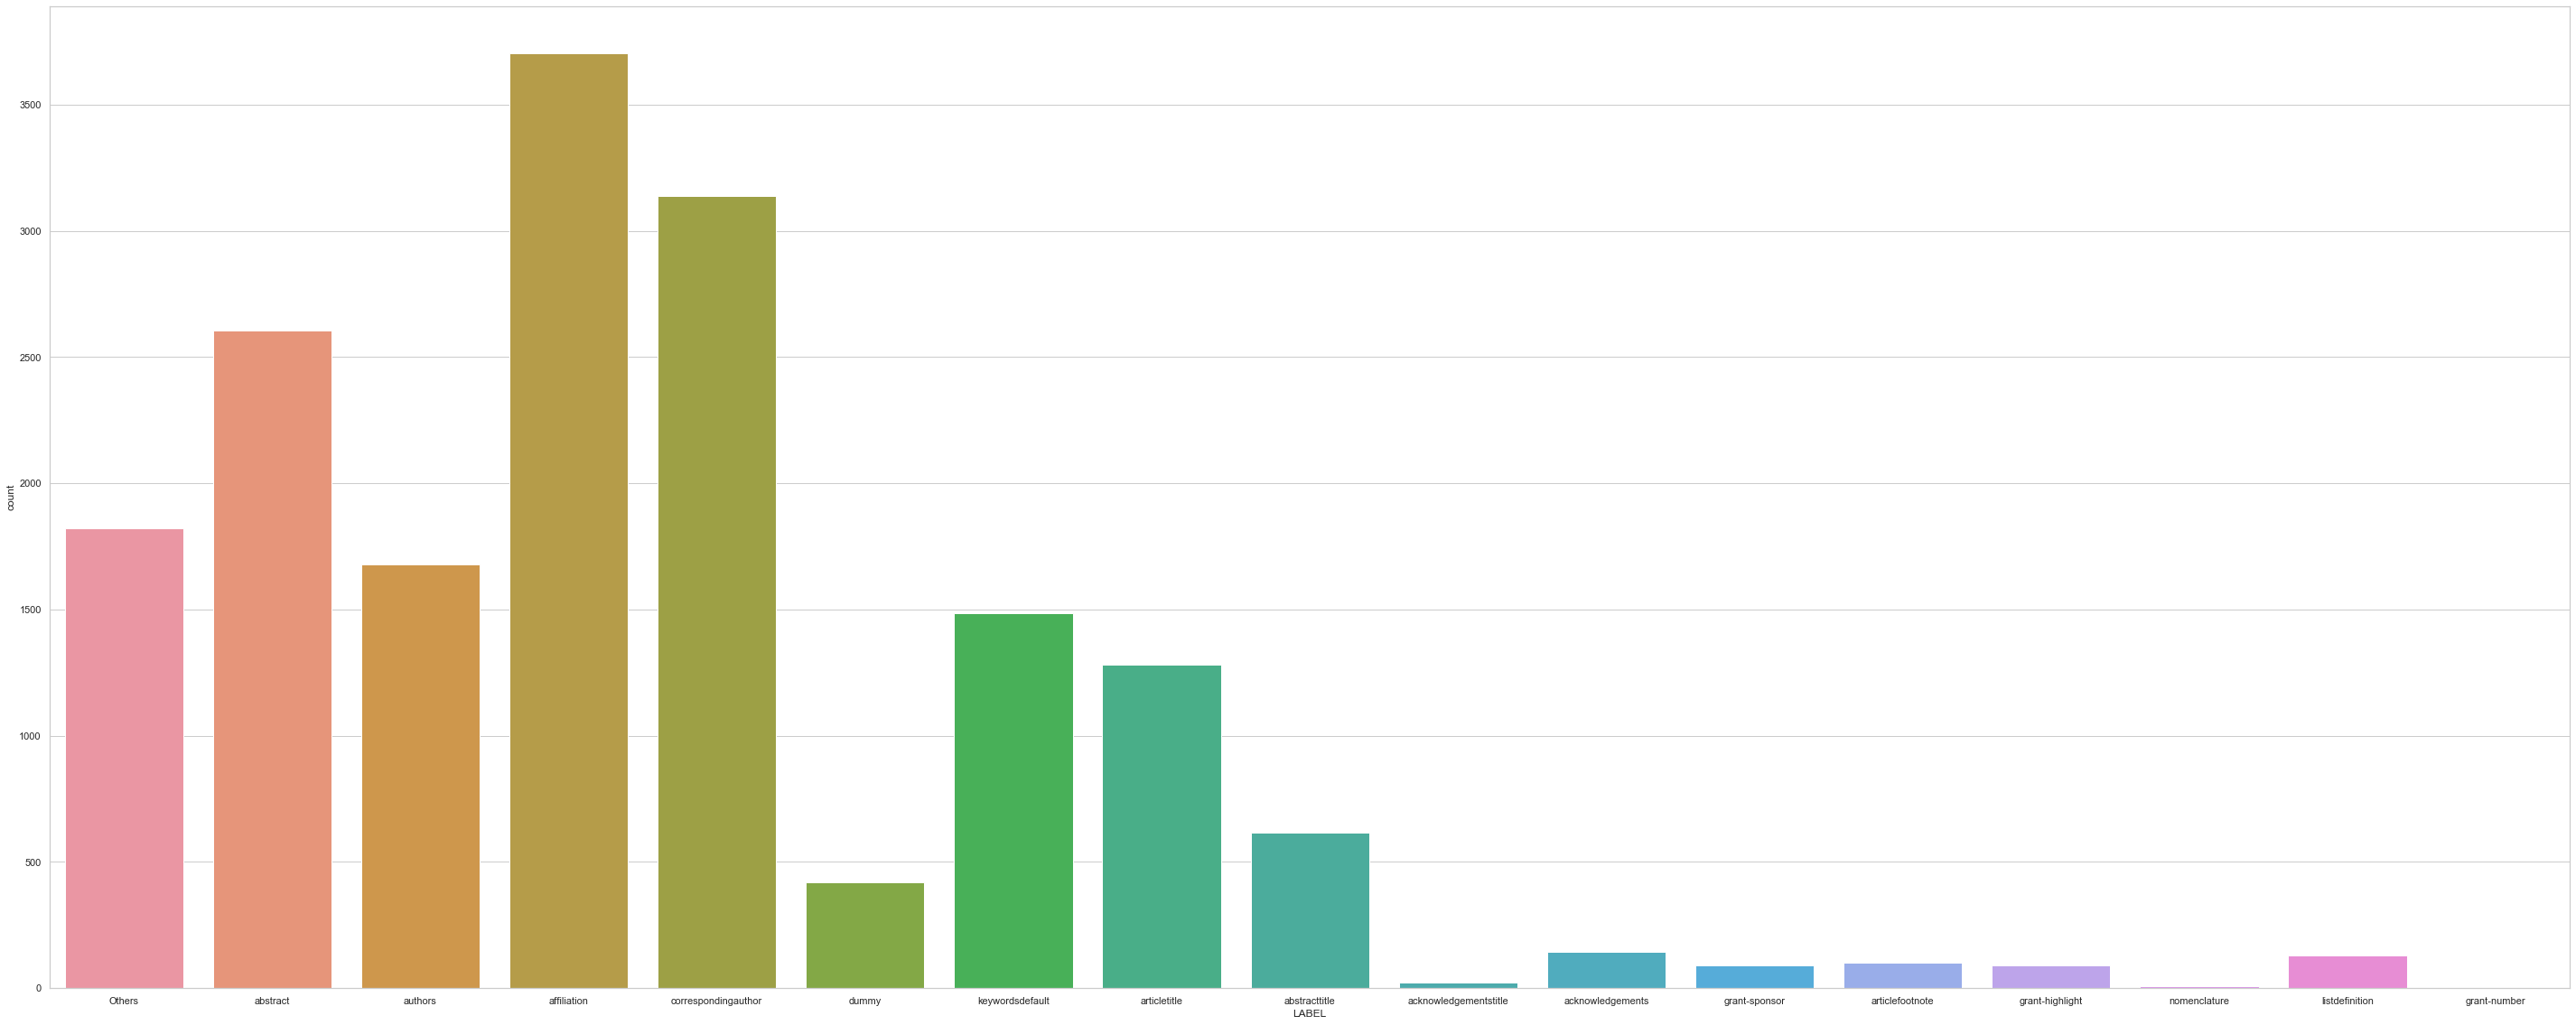

In [44]:
plt.figure(figsize=(50,20))
sns.countplot(x = df1['LABEL'])

- There are total 17 classes in this dataset.
- affiliation has the highest count and grant number has the lowest.
- we can say its that the target variable is skewed and the lowest count classes have very less data.

In [45]:
X = df1.drop('LABEL', axis = 1)

# dependent variable
y = df1["LABEL"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 123)

In [47]:
def model_evaluation(actuals, predictions) : 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    print('\nAccuracy Score :', accuracy_score(actuals, predictions)) 
    print("------------------------------------------------------------------")

In [48]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [50]:
model_evaluation(y_train , pred_train_rf)


Report : 
                       precision    recall  f1-score   support

               Others       0.93      0.94      0.94      1460
             abstract       0.99      0.97      0.98      2083
        abstracttitle       0.86      0.99      0.92       504
     acknowledgements       1.00      0.86      0.93       108
acknowledgementstitle       0.95      1.00      0.97        18
          affiliation       0.99      1.00      0.99      2928
      articlefootnote       0.99      0.84      0.91        89
         articletitle       0.99      0.99      0.99      1051
              authors       0.99      0.99      0.99      1361
  correspondingauthor       0.99      0.99      0.99      2486
                dummy       0.95      0.87      0.91       316
      grant-highlight       1.00      0.87      0.93        79
         grant-number       1.00      1.00      1.00         2
        grant-sponsor       0.99      0.93      0.96        76
      keywordsdefault       0.99      0.99 

In [51]:
model_evaluation(y_test , pred_test_rf)



Report : 
                       precision    recall  f1-score   support

               Others       0.76      0.75      0.75       361
             abstract       0.90      0.90      0.90       521
        abstracttitle       0.82      0.96      0.89       111
     acknowledgements       0.63      0.32      0.43        37
acknowledgementstitle       1.00      0.50      0.67         4
          affiliation       0.84      0.93      0.88       776
      articlefootnote       0.09      0.09      0.09        11
         articletitle       0.82      0.87      0.85       232
              authors       0.80      0.80      0.80       317
  correspondingauthor       0.84      0.81      0.82       652
                dummy       0.50      0.28      0.36       102
      grant-highlight       0.80      0.33      0.47        12
        grant-sponsor       0.50      0.19      0.27        16
      keywordsdefault       0.81      0.81      0.81       287
       listdefinition       0.78      0.62 

## Recursive Feature Elimination
- The Recursive Feature Elimination (RFE) method is a feature selection approach. 
- It works by recursively removing attributes and building a model on those attributes that remain. 
- It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.



In [53]:
from sklearn.feature_selection import RFE, f_regression


In [56]:
rfe = RFE(rf, n_features_to_select=100, verbose =3 )
rfe.fit(X_train,y_train)


Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
F

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=100, step=1, verbose=3)

In [57]:
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)),X_train.columns , order=-1)
ranks['RFE']

{'FG1': 1.0,
 'FG2': 1.0,
 'FG3': 1.0,
 'FG4': 1.0,
 'FG5': 1.0,
 'FG6': 1.0,
 'FG7': 1.0,
 'FG8': 1.0,
 'FG9': 1.0,
 'FG10': 1.0,
 'FG11': 1.0,
 'FG12': 1.0,
 'FG13': 1.0,
 'FG14': 1.0,
 'FG15': 1.0,
 'FG16': 1.0,
 'FG17': 1.0,
 'FG18': 1.0,
 'FG19': 1.0,
 'FG20': 1.0,
 'FG21': 1.0,
 'FG22': 1.0,
 'FG23': 1.0,
 'FG24': 1.0,
 'FG25': 1.0,
 'FG26': 1.0,
 'FG27': 1.0,
 'FG28': 1.0,
 'FG29': 1.0,
 'FG30': 1.0,
 'FG31': 1.0,
 'FG32': 1.0,
 'FG33': 1.0,
 'FG34': 1.0,
 'FG35': 1.0,
 'FG36': 1.0,
 'FG37': 1.0,
 'FG38': 1.0,
 'FG39': 1.0,
 'FG40': 1.0,
 'FG41': 1.0,
 'FG42': 1.0,
 'FG43': 1.0,
 'FG44': 1.0,
 'FG45': 1.0,
 'FG46': 1.0,
 'FG47': 1.0,
 'FG48': 1.0,
 'FG49': 1.0,
 'FG50': 1.0,
 'SW_COM': 1.0,
 'SW_SEMCOL': 1.0,
 'SW_STOP': 1.0,
 'SW_COL': 1.0,
 'ND': 1.0,
 'LEN': 1.0,
 'DP_DOBJ': 1.0,
 'DP_PREP': 1.0,
 'DP_POBJ': 1.0,
 'DP_NSUBJ': 1.0,
 'DP_NLA': 1.0,
 'DP_NRA': 1.0,
 'DP_NNC': 1.0,
 'CG1': 1.0,
 'CG2': 0.68,
 'CG3': 0.94,
 'CG4': 1.0,
 'CG5': 1.0,
 'CG6': 1.0,
 'CG7': 0.79,
 'CG8

_This are the 34 important features using recursive feature selection method_

In [58]:
r = {}
for name in X_train.columns:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in X_train.columns:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))


	RFE	Mean
FG1	1.0	1.0
FG2	1.0	1.0
FG3	1.0	1.0
FG4	1.0	1.0
FG5	1.0	1.0
FG6	1.0	1.0
FG7	1.0	1.0
FG8	1.0	1.0
FG9	1.0	1.0
FG10	1.0	1.0
FG11	1.0	1.0
FG12	1.0	1.0
FG13	1.0	1.0
FG14	1.0	1.0
FG15	1.0	1.0
FG16	1.0	1.0
FG17	1.0	1.0
FG18	1.0	1.0
FG19	1.0	1.0
FG20	1.0	1.0
FG21	1.0	1.0
FG22	1.0	1.0
FG23	1.0	1.0
FG24	1.0	1.0
FG25	1.0	1.0
FG26	1.0	1.0
FG27	1.0	1.0
FG28	1.0	1.0
FG29	1.0	1.0
FG30	1.0	1.0
FG31	1.0	1.0
FG32	1.0	1.0
FG33	1.0	1.0
FG34	1.0	1.0
FG35	1.0	1.0
FG36	1.0	1.0
FG37	1.0	1.0
FG38	1.0	1.0
FG39	1.0	1.0
FG40	1.0	1.0
FG41	1.0	1.0
FG42	1.0	1.0
FG43	1.0	1.0
FG44	1.0	1.0
FG45	1.0	1.0
FG46	1.0	1.0
FG47	1.0	1.0
FG48	1.0	1.0
FG49	1.0	1.0
FG50	1.0	1.0
SW_COM	1.0	1.0
SW_SEMCOL	1.0	1.0
SW_STOP	1.0	1.0
SW_COL	1.0	1.0
ND	1.0	1.0
LEN	1.0	1.0
DP_DOBJ	1.0	1.0
DP_PREP	1.0	1.0
DP_POBJ	1.0	1.0
DP_NSUBJ	1.0	1.0
DP_NLA	1.0	1.0
DP_NRA	1.0	1.0
DP_NNC	1.0	1.0
CG1	1.0	1.0
CG2	0.68	0.68
CG3	0.94	0.94
CG4	1.0	1.0
CG5	1.0	1.0
CG6	1.0	1.0
CG7	0.79	0.79
CG8	0.56	0.56
CG9	1.0	1.0
CG10	0.85	0.85
CG11	0.62	0.62
CG12	1

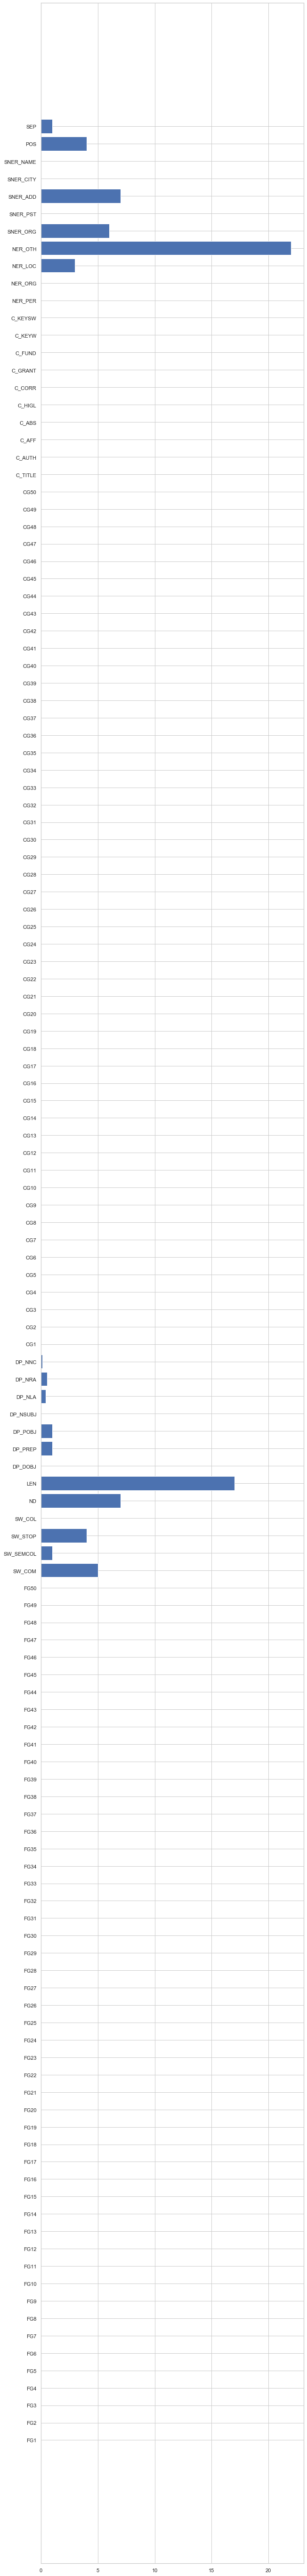

In [30]:
plt.rcParams["figure.figsize"] =10,100
plt.barh(X_train.columns, X_train.iloc[0].values)
plt.show()

In [59]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
pred_train_xg = xg.predict(X_train)
pred_test_xg = xg.predict(X_test)

In [60]:
model_evaluation(y_train , pred_train_xg)


Report : 
                       precision    recall  f1-score   support

               Others       0.80      0.80      0.80      1460
             abstract       0.91      0.89      0.90      2083
        abstracttitle       0.83      0.99      0.90       504
     acknowledgements       0.69      0.37      0.48       108
acknowledgementstitle       0.89      0.94      0.92        18
          affiliation       0.87      0.93      0.90      2928
      articlefootnote       0.86      0.27      0.41        89
         articletitle       0.88      0.92      0.90      1051
              authors       0.85      0.85      0.85      1361
  correspondingauthor       0.83      0.86      0.84      2486
                dummy       0.68      0.26      0.38       316
      grant-highlight       0.96      0.28      0.43        79
         grant-number       1.00      1.00      1.00         2
        grant-sponsor       0.90      0.47      0.62        76
      keywordsdefault       0.86      0.89 

In [61]:
model_evaluation(y_test , pred_test_xg)


Report : 
                       precision    recall  f1-score   support

               Others       0.76      0.78      0.77       361
             abstract       0.89      0.88      0.89       521
        abstracttitle       0.83      0.99      0.90       111
     acknowledgements       0.17      0.05      0.08        37
acknowledgementstitle       1.00      0.75      0.86         4
          affiliation       0.85      0.93      0.89       776
      articlefootnote       0.00      0.00      0.00        11
         articletitle       0.81      0.85      0.83       232
              authors       0.78      0.79      0.79       317
  correspondingauthor       0.79      0.83      0.81       652
                dummy       0.48      0.12      0.19       102
      grant-highlight       1.00      0.08      0.15        12
        grant-sponsor       0.75      0.19      0.30        16
      keywordsdefault       0.82      0.83      0.83       287
       listdefinition       0.94      0.55 

## Feature Importance

- Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. 
- These importance values can be used to inform a feature selection process.

In [63]:
print(rf.feature_importances_)

[1.14952322e-02 4.84784426e-03 1.30453905e-02 4.75896167e-03
 5.62539948e-03 8.90549009e-03 7.78221784e-03 1.25557629e-02
 5.69918031e-03 6.69188722e-03 4.27814566e-03 7.17262719e-03
 5.15207450e-03 6.33195394e-03 8.88755300e-03 1.08437322e-02
 8.58347310e-03 7.35079779e-03 9.75922143e-03 5.06510606e-03
 7.14893154e-03 1.02263369e-02 8.89610796e-03 5.55201853e-03
 9.54618105e-03 9.85641173e-03 6.84546497e-03 5.75950394e-03
 7.86428802e-03 7.50697485e-03 1.46352363e-02 8.41249606e-03
 4.16549439e-03 9.82299208e-03 1.00147451e-02 3.89693109e-03
 6.75077888e-03 5.17929169e-03 1.15769057e-02 6.26017468e-03
 7.37018831e-03 8.47705918e-03 4.81069796e-03 6.50176849e-03
 7.04771231e-03 8.46669604e-03 9.52167820e-03 6.16955737e-03
 3.70339833e-03 4.95756550e-03 2.43811981e-02 2.11399285e-03
 1.50678677e-02 1.37903400e-02 1.18906102e-02 2.94672124e-02
 4.99244281e-03 1.55090215e-02 1.99312563e-02 3.58163492e-03
 1.80150682e-02 1.48211614e-02 2.23222396e-02 9.32490253e-03
 3.65664961e-04 4.914529

In [64]:
importance = pd.DataFrame([rf.feature_importances_], 
                          columns = X_train.columns)

importance.sort_values(by = 0, axis = 1, 
                       ascending = False, 
                       inplace = True)

In [65]:
importance


,POS,SNER_ORG,LEN,NER_OTH,NER_LOC,SW_COM,CG28,DP_NNC,DP_POBJ,DP_NLA,CG23,DP_PREP,SW_STOP,DP_NRA,FG31,SW_COL,FG3,FG8,ND,CG25,FG39,CG45,FG1,FG16,FG22,SNER_CITY,FG35,CG14,CG35,FG26,FG34,FG19,FG25,FG47,CG9,CG1,CG41,FG6,C_TITLE,FG23,FG15,CG27,FG17,FG42,FG46,FG32,FG29,FG7,FG30,FG41,FG18,FG12,FG21,CG36,FG45,FG27,FG37,FG10,FG44,FG14,SNER_ADD,FG40,CG47,FG48,CG26,CG7,FG28,SEP,FG9,FG5,FG24,CG40,CG30,NER_PER,CG50,FG38,FG13,CG33,FG20,DP_DOBJ,FG50,FG2,FG43,CG6,CG42,FG4,C_ABS,C_FUND,FG11,SNER_NAME,FG33,FG36,FG49,DP_NSUBJ,CG8,SW_SEMCOL,CG39,CG18,CG20,CG17,CG37,NER_ORG,CG16,CG12,CG22,CG31,CG24,CG10,SNER_PST,CG49,CG32,CG21,CG4,CG15,CG43,CG34,CG3,CG48,CG13,CG19,CG46,CG44,CG29,CG2,CG38,CG11,CG5,C_AFF,C_HIGL,C_AUTH,C_KEYSW,C_KEYW,C_GRANT,C_CORR
0,0.067,0.047,0.029,0.029,0.028,0.024,0.023,0.022,0.02,0.018,0.016,0.016,0.015,0.015,0.015,0.014,0.013,0.013,0.012,0.012,0.012,0.012,0.011,0.011,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.008,0.008,0.008,0.008,0.008,0.008,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.003,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,9.410e-04,9.043e-04,8.910e-04,7.999e-04,7.641e-04,7.354e-04,7.352e-04,6.839e-04,6.460e-04,6.220e-04,5.505e-04,5.195e-04,5.179e-04,4.915e-04,4.536e-04,4.341e-04,4.337e-04,3.986e-04,3.869e-04,3.813e-04,3.657e-04,3.395e-04,2.459e-04,2.023e-04,1.853e-04,1.666e-04,1.435e-04,1.269e-04,4.266e-05,3.981e-05,3.607e-05


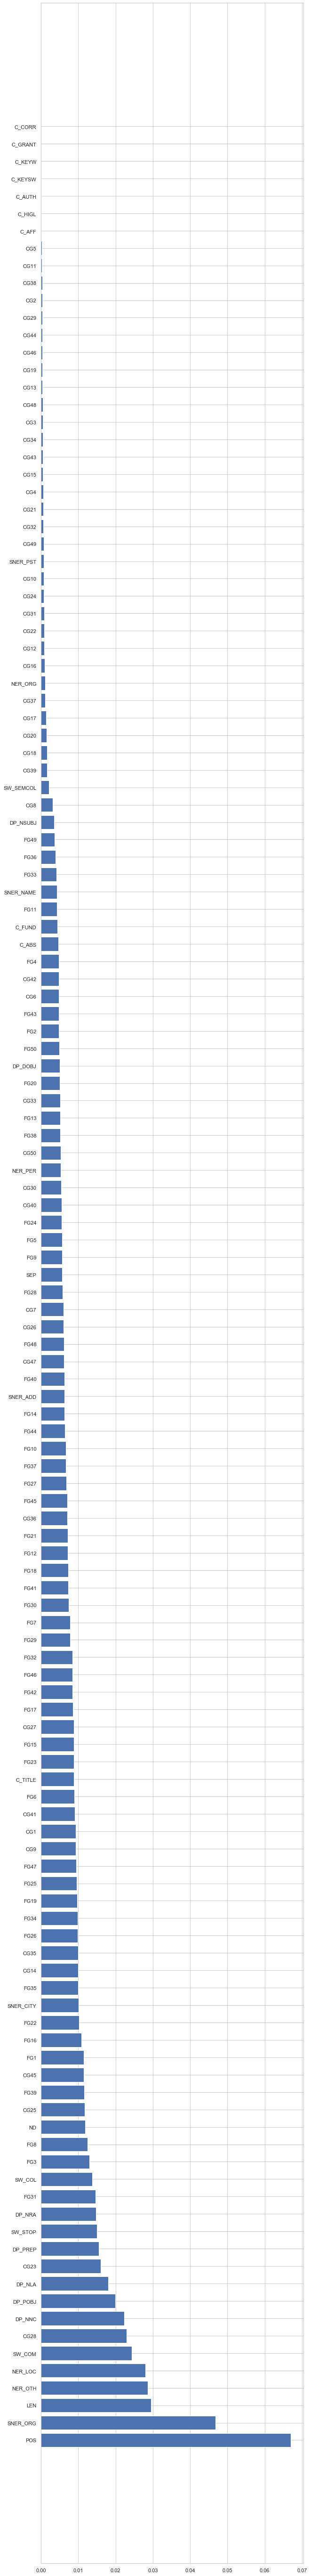

In [66]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] =10,100
plt.barh(importance.columns, importance.iloc[0].values)
plt.show()

This feature have the least importance as per feature importance technique

['C_TITLE', 'C_HIGL', 'C_CORR', 'C_KEYSW','CG49', 'C_AFF', 'CG38', 'CG50', 'CG39', 'CG46', 'CG2',  'CG18', 'CG42', 'CG14', 'CG48', 'CG33', 'CG37', 'CG21', 'CG32', 'CG5', 'CG4', 'CG3', 'CG11', 'CG45' , 'CG44', 'CG13', 'CG43', 'CG8', 'CG25', 'CG40', 'CG29', 'CG47',  'CG15', 'CG27', 'CG41', 'CG1'
        , 'CG36', 'CG16', 'CG17', 'CG16', 'CG6', 'CG26', 'CG23', 'CG30', 'FG47', 'FG30', 'FG14', 'FG21', 'FG35', 'FG2', 'FG23', 'FG37', 'FG8'
        , 'FG7', 'FG33', 'FG28', 'FG11', 'FG43', 'FG45', 'FG27', 'FG42', 'FG18', 'FG46', 'FG1', 'FG16', 'FG3', 'FG25', 'FG19', 'FG48', 'FG4', 'FG9', 'FG36'
        , 'FG40', 'FG50', 'FG12', 'FG24', 'FG29' , 'FG20',  'FG5', 'FG6', 'FG13', 'FG17', 'FG22', 'FG49', 'C_HIGL', 'C_CORR'
         , 'C_KEYSW', 'C_KEYW', 'C_AFF', 'C_AUTH','C_GRANT', 'SNER_PST', 'SNER_CITY', 'SNER_NAME', 'SEP', 'SNER_ADD', 'SW_SEMCOL', 'NER_ORG']

## Logistic Regression:

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_train_logreg = logreg.predict(X_train)
pred_test_logreg = logreg.predict(X_test)

In [72]:
model_evaluation(y_train , pred_train_logreg)
model_evaluation(y_test , pred_test_logreg)



Report : 
                       precision    recall  f1-score   support

               Others       0.73      0.72      0.73      1460
             abstract       0.86      0.86      0.86      2083
        abstracttitle       0.82      0.98      0.89       504
     acknowledgements       0.48      0.19      0.27       108
acknowledgementstitle       0.88      0.83      0.86        18
          affiliation       0.82      0.90      0.86      2928
      articlefootnote       0.12      0.01      0.02        89
         articletitle       0.79      0.89      0.84      1051
              authors       0.79      0.80      0.80      1361
  correspondingauthor       0.77      0.79      0.78      2486
                dummy       0.41      0.06      0.11       316
      grant-highlight       0.62      0.13      0.21        79
         grant-number       1.00      0.50      0.67         2
        grant-sponsor       0.55      0.16      0.24        76
      keywordsdefault       0.80      0.81 

## Decision Tree:

In [74]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_train_dtc = dtc.predict(X_train)
pred_test_dtc = dtc.predict(X_test)

In [75]:
model_evaluation(y_train , pred_train_dtc)
model_evaluation(y_test , pred_test_dtc)



Report : 
                       precision    recall  f1-score   support

               Others       0.94      0.95      0.94      1460
             abstract       1.00      0.98      0.99      2083
        abstracttitle       0.86      0.98      0.92       504
     acknowledgements       0.99      0.93      0.96       108
acknowledgementstitle       1.00      1.00      1.00        18
          affiliation       1.00      1.00      1.00      2928
      articlefootnote       1.00      0.85      0.92        89
         articletitle       1.00      1.00      1.00      1051
              authors       1.00      1.00      1.00      1361
  correspondingauthor       0.99      0.99      0.99      2486
                dummy       0.98      0.89      0.93       316
      grant-highlight       1.00      0.96      0.98        79
         grant-number       1.00      1.00      1.00         2
        grant-sponsor       1.00      0.96      0.98        76
      keywordsdefault       1.00      1.00 

## Random Forest with hyper tunning:

In [77]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [78]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)
pred_train_rfc1 = rfc1.predict(X_train)
pred_test_rfc1 = rfc1.predict(X_test)

In [79]:
model_evaluation(y_train , pred_train_rfc1)
model_evaluation(y_test , pred_test_rfc1)



Report : 
                       precision    recall  f1-score   support

               Others       0.93      0.94      0.93      1460
             abstract       0.99      0.97      0.98      2083
        abstracttitle       0.86      0.99      0.92       504
     acknowledgements       1.00      0.90      0.95       108
acknowledgementstitle       1.00      1.00      1.00        18
          affiliation       0.99      1.00      0.99      2928
      articlefootnote       0.99      0.83      0.90        89
         articletitle       1.00      0.99      0.99      1051
              authors       0.99      0.99      0.99      1361
  correspondingauthor       0.99      0.99      0.99      2486
                dummy       0.95      0.86      0.91       316
      grant-highlight       0.99      0.94      0.96        79
         grant-number       1.00      1.00      1.00         2
        grant-sponsor       0.99      0.93      0.96        76
      keywordsdefault       0.99      0.99 

## Conclusion:

<div class="alert alert-block alert-info"><b> 
    
-  Feature Selection helps us to choose the features which are important in our model building.
-  Depending on our requirements and how much accuracy we want we can choose the features.
-  The best classiifer is XGBoost.
-  Tree Classifier are overfitting.
</b></div>